# Setup

In [62]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline
waiting_times_day = np.loadtxt('call_center.csv')


In [63]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)


In [64]:
hour_13 = waiting_times_per_hour[13]

# Q1: Hour 13 Posterior

In [6]:
import pystan

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

I'm assuming hyperparamaters for the prior Gamma to be (0.001,0.001). This is so that it will have very little effect on the posterior relative to the data entries. This is done to reflect my uncertainties regarding the prior.

## Exponential Gamma

In [7]:
exp_gamma_data = {
    'alpha': 0.001,  # fixed prior hyperparameters for the
    'beta': 0.001,   # gamma distribution
    'count': len(hour_13),  # count of datapoints
    'calls': hour_13
}

In [8]:
exp_gamma_stan = """
data {
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    int<lower=0> count;   // number of datapoints
    real<lower=0> calls[count];  // datapoints   
}

parameters {
    real<lower=0> lambda;  // rate for exponential distribution
}

model {
    lambda ~ gamma(alpha, beta);    // prior over lambda
    for(i in 1:count) {
        calls[i] ~ exponential(lambda);  // likelihood function
    }
    
}

"""

In [9]:
exp_gamma_model = pystan.StanModel(model_code=exp_gamma_stan)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f49224f7e528bff1191ad6e396ca4376 NOW.


In [10]:
exp_gamma_results = exp_gamma_model.sampling(data=exp_gamma_data)
exp_gamma_samples = exp_gamma_results.extract()


In [119]:
exp_gamma_98 = np.percentile(exp_gamma_samples['lambda'], [1,99])
print("Posterior 98% confidence interval over λ: {}".format(exp_gamma_98))

Posterior 98% confidence interval over λ: [5.62960739 7.14442967]


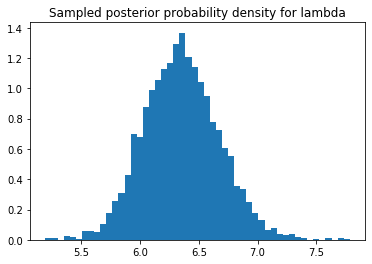

In [120]:
plt.hist(exp_gamma_samples['lambda'], bins=50, density=True)
plt.title('Sampled posterior probability density for lambda')
plt.show()

## Normal Norm-inv-Gamma

___________

In [58]:
data2 = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

In [85]:
norm_norminvgamma_data = {
    'alpha': 0.001,  # fixed prior hyperparameters for the
    'beta': 0.001,   # gamma distribution
    'mu_0': 2.3, # ""
    'nu_0': 0.1, # ""
    'count': len(data2),  # count of datapoints
    'info': data2
}

In [90]:
norm_norminvgamma_stan = """
data {
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real mu_0;   // fixed prior hyperparameter
    real nu_0;   // fixed prior hyperparameter
    int<lower=0> count;   // number of datapoints
    real info[count];  // datapoints   
}

parameters {
    real mu;  // mean for normal distribution
    real<lower=0> sigma_sq;  // variation for normal distribution
}

model {
    sigma_sq ~ inv_gamma(alpha,beta); // prior over sigma squared
    mu ~ normal(mu_0,sqrt(sigma_sq/nu_0)); // prior over mean
    for(i in 1:count) {
        info[i] ~ normal(mu,sqrt(sigma_sq));  // likelihood function
    }
    
}

"""

In [91]:
norm_norminvgamma_model = pystan.StanModel(model_code=norm_norminvgamma_stan)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5e1360a5ff72b8916e8ddc30a57896a7 NOW.


In [109]:
norm_norminvgamma_res = norm_norminvgamma_model.sampling(data=norm_norminvgamma_data)
norm_norminvgamma_samples = norm_norminvgamma_res.extract()


In [122]:
norm_norminvgamma_mu_95 = np.percentile(norm_norminvgamma_samples['mu'], [2.5, 97.5])
norm_norminvgamma_ssq_95 = np.percentile(norm_norminvgamma_samples['sigma_sq'], [2.5, 97.5])

print("Posterior 95% confidence interval over mu: {}".format(norm_norminvgamma_mu_95))
print("Posterior 95% confidence interval over sigma squared: {}".format(norm_norminvgamma_ssq_95))



Posterior 95% confidence interval over mu: [2.80205366 3.33729801]
Posterior 95% confidence interval over sigma squared: [2.98296297 4.39636363]


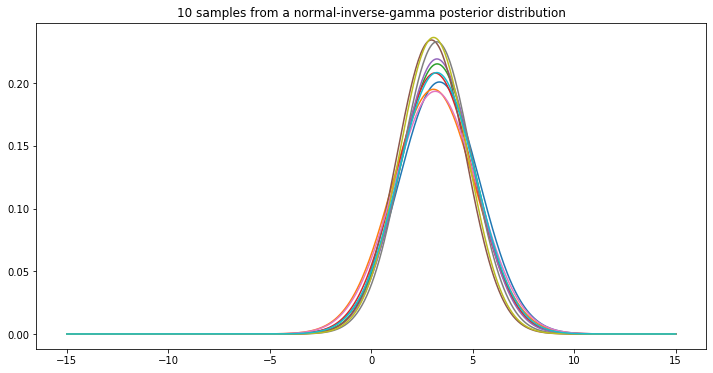

In [112]:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(10):
    plot_y = stats.norm.pdf(plot_x, loc=norm_norminvgamma_samples["mu"][i], scale=np.sqrt(norm_norminvgamma_samples["sigma_sq"][i]))
    plt.plot(plot_x, plot_y)
plt.title('10 samples from a normal-inverse-gamma posterior distribution')
plt.show()


## Log Normal

In [113]:
hrtem_data = np.loadtxt('hrtem.csv')
log_data = np.log(hrtem_data)

In [114]:
lognorm_norminvgamma_data = {
    'alpha': 0.001,  # fixed prior hyperparameters for the
    'beta': 0.001,   # gamma distribution
    'mu_0': 3, # ""
    'nu_0': 0.3, # ""
    'count': len(log_data),  # count of datapoints
    'info': log_data
}

In [116]:
lognorm_norminvgamma_res = norm_norminvgamma_model.sampling(data=lognorm_norminvgamma_data)
lognorm_norminvgamma_samples = lognorm_norminvgamma_res.extract()

In [117]:
lognorm_norminvgamma_mu_95 = np.percentile(lognorm_norminvgamma_samples['mu'], [2.5, 97.5])
lognorm_norminvgamma_ssq_95 = np.percentile(lognorm_norminvgamma_samples['sigma_sq'], [2.5, 97.5])

print("Posterior 95% confidence interval over mu: {}".format(lognorm_norminvgamma_mu_95))
print("Posterior 95% confidence interval over sigma squared: {}".format(lognorm_norminvgamma_ssq_95))



Posterior 95% confidence interval over mu: [1.83294175 1.95493416]
Posterior 95% confidence interval over sigma squared: [0.4253     0.54518753]


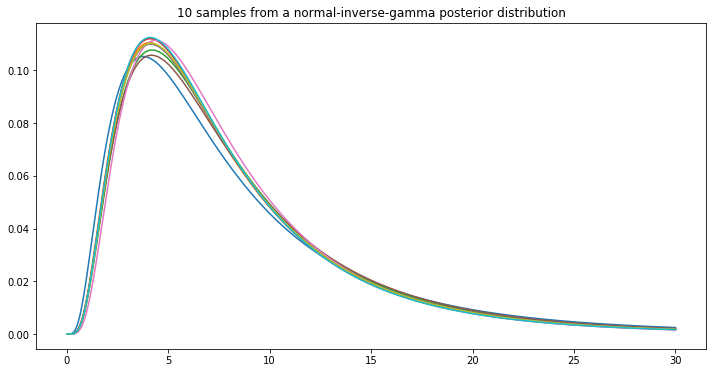

In [118]:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(0, 30, 500)
for i in range(10):
    plot_y = stats.lognorm.pdf(plot_x, np.sqrt(lognorm_norminvgamma_samples["sigma_sq"][i]),scale=np.exp(lognorm_norminvgamma_samples["mu"][i]))
    plt.plot(plot_x, plot_y)
plt.title('10 samples from a normal-inverse-gamma posterior distribution')
plt.show()
